# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;














# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.

- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [107]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from IPython.display import display

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [55]:
df = pd.read_csv('datasets/insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [56]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [57]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
3646,0,50.0,45900.0,1,2
2808,0,20.0,38200.0,1,0
2683,0,21.0,58400.0,1,0
1854,1,19.0,58100.0,1,0
2512,1,19.0,43200.0,1,0
3229,0,31.0,16000.0,2,0
646,1,51.0,32800.0,1,2
4516,1,28.0,38100.0,0,0
957,0,27.0,42300.0,2,0
1367,1,45.0,41200.0,1,1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [59]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial
df['age'] = df['age'].astype(int)

In [60]:
# comprueba que la conversión se haya realizado con éxito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [61]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.
# ¿Se ve todo bien?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [62]:
df.isna().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

In [63]:
df.duplicated().sum()

np.int64(153)

Hay 153 filas duplicadas, estas podrian ser personas con las mismas condiciones, no me preocuparia mucho por ellos. Debido a que no tenemos un factor de identificacion unico, algo asi como un user_id, asymire que son clientes diferentes con el mismo tipo de ingreso, genero, edad, familia y beneficiarios.


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - ¡Buen trabajo preparando los datos para el análisis! Has hecho una revisión básica completa: carga, renombrado de columnas, verificación de tipos, y chequeo de duplicados. Esto es esencial antes de iniciar cualquier análisis de datos.

</div>

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atención</b> ⚠️ - Aunque consideraste que los duplicados pueden representar clientes diferentes con características similares, sería ideal verificar si afectan la distribución general de los datos. Una posible mejora sería comparar estadísticas con y sin duplicados o usar `drop_duplicates()` condicionalmente.

</div>



## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

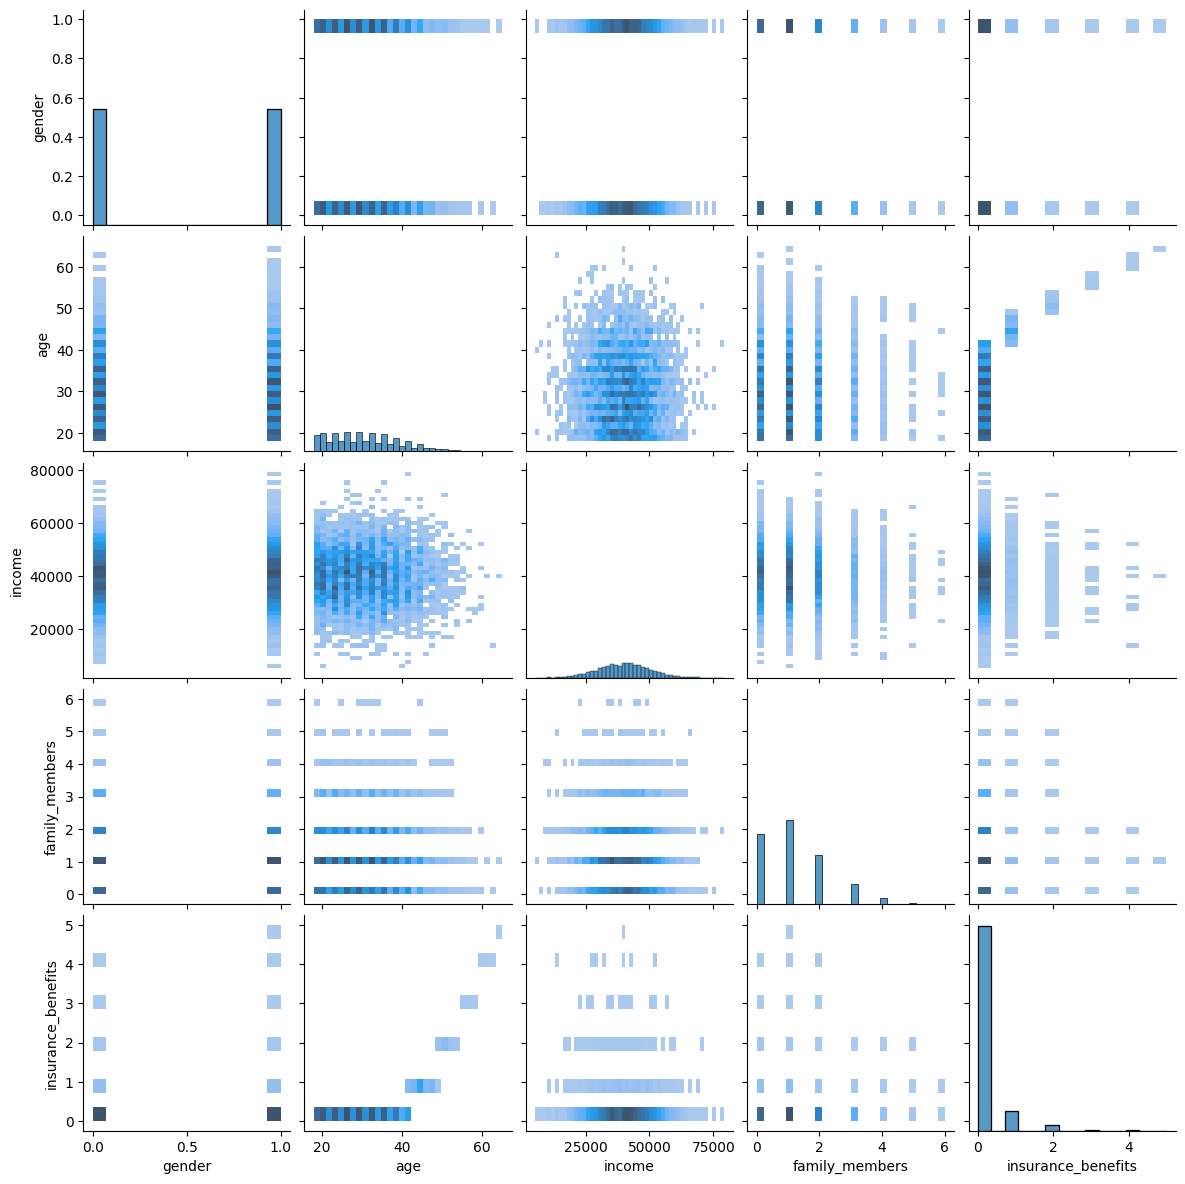

In [64]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.

Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)
- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.

Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.

Pruébalo para cuatro combinaciones de dos casos
- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:
- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?
- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [65]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [66]:
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar
    :param n: número de objetos para los que se buscan los vecinos más cercanos
    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia
    """
    df = df[feature_names]
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric).fit(df[feature_names])
    #nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    nbrs_distances, nbrs_indices = nbrs.kneighbors(df.iloc[[n]][feature_names], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Escalar datos.

In [67]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

/var/folders/75/n09kg0s137s895fc3yg04jg00000gn/T/ipykernel_63752/760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.63076923 0.70769231 0.44615385 ... 0.30769231 0.33846154 0.43076923]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())
/var/folders/75/n09kg0s137s895fc3yg04jg00000gn/T/ipykernel_63752/760832288.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.16666667 0.16666667 0.         ... 0.33333333 0.5        0.16666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())


In [68]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
1977,1,0.584615,0.511392,0.000000,0
4930,0,0.292308,0.572152,0.000000,0
1311,0,0.492308,0.686076,0.166667,0
4066,0,0.384615,0.326582,0.166667,0
3937,0,0.446154,0.536709,0.000000,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [69]:
print('DF Sin Escalar - Euclidean\n')
print(get_knn(df, 0, 5, 'euclidean'))

print('\nDF Con Escalado - Euclidean\n')
print(get_knn(df_scaled, 0, 5, 'euclidean'))

DF Sin Escalar - Euclidean

      gender  age   income  family_members  distance
0          1   41  49600.0               1  0.000000
2022       1   41  49600.0               0  1.000000
1225       0   42  49600.0               0  1.732051
4031       1   44  49600.0               2  3.162278
3424       0   38  49600.0               0  3.316625

DF Con Escalado - Euclidean

      gender       age    income  family_members  distance
0          1  0.630769  0.627848        0.166667  0.000000
2689       1  0.630769  0.634177        0.166667  0.006329
133        1  0.615385  0.636709        0.166667  0.017754
4869       1  0.646154  0.637975        0.166667  0.018418
3275       1  0.646154  0.651899        0.166667  0.028550


In [70]:
print('DF Sin Escalar - Manhattan\n')
print(get_knn(df, 0, 5, 'manhattan'))

print('\nDF Con Escalado - Manhattan\n')
print(get_knn(df_scaled, 0, 5, 'manhattan'))

DF Sin Escalar - Manhattan

      gender  age   income  family_members  distance
0          1   41  49600.0               1       0.0
2022       1   41  49600.0               0       1.0
1225       0   42  49600.0               0       3.0
4031       1   44  49600.0               2       4.0
815        1   37  49600.0               2       5.0

DF Con Escalado - Manhattan

      gender       age    income  family_members  distance
0          1  0.630769  0.627848        0.166667  0.000000
2689       1  0.630769  0.634177        0.166667  0.006329
133        1  0.615385  0.636709        0.166667  0.024245
4869       1  0.646154  0.637975        0.166667  0.025511
2103       1  0.630769  0.596203        0.166667  0.031646


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Sí, afecta directamente. kNN depende de distancias, y si las variables tienen rangos distintos, las de mayor rango dominan el cálculo de distancia, en este caso, el ingreso. Esto puede llevar a que el algoritmo considere más importantes ciertas características numéricas, aunque no lo sean realmente. Escalar asegura que todas las variables contribuyan equitativamente.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Los resultados obtenidos usando la métrica Manhattan son bastante similares a los de la métrica Euclidiana, especialmente cuando los datos están escalados. Sin embargo, no siempre coinciden exactamente, ya que Manhattan mide distancias sumando diferencias absolutas, mientras que Euclidiana calcula la distancia en línea recta. Esta diferencia puede cambiar ligeramente la selección de vecinos más cercanos en ciertos casos.


<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente implementación del algoritmo kNN para encontrar clientes similares. La función `get_knn()` está bien estructurada y parametrizada, permitiendo experimentar con diferentes métricas y escalados. Además, las pruebas realizadas muestran una comprensión clara del impacto del escalado y de las métricas de distancia.

</div>

<div class="alert alert-block alert-warning">

<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Atención</b> ⚠️ - Sería útil encapsular los experimentos (las 4 combinaciones) en una función para evitar repetición de código y facilitar futuras pruebas o ajustes. También podrías considerar una visualización que compare gráficamente los vecinos para observar tendencias.

</div>


# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.

Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.
- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.

La probabilidad de pagar cualquier prestación del seguro puede definirse como

$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [71]:
# сalcula el objetivo

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)

In [72]:
# comprueba el desequilibrio de clases con value_counts()

df['insurance_benefits_received'].value_counts(normalize=True)

insurance_benefits_received
0    0.8872
1    0.1128
Name: proportion, dtype: float64

In [73]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [74]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [75]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df))
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.8872 0.    ]
 [0.1128 0.    ]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.7914 0.0958]
 [0.0994 0.0134]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.456  0.4312]
 [0.053  0.0598]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.     0.8872]
 [0.     0.1128]]



In [76]:
# Separamos variables target y objetivo
features = ['gender', 'age', 'income', 'family_members']
target = 'insurance_benefits_received'

X = df[features]
y = df[target]

# Separo con Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
scaler = sklearn.preprocessing.MaxAbsScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
def kclassifier(X_train, y_train, X_test, y_test):
    for k in range(1,11):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 = sklearn.metrics.f1_score(y_test, y_pred)
        print(f'k={k}: F1-score = {f1:.3f}')

In [79]:
print('F1 para dataset sin escalar\n') 
kclassifier(X_train, y_train, X_test, y_test)
print('\nF1 para dataset escalado\n') 
kclassifier(X_train_scaled, y_train, X_test_scaled, y_test)

F1 para dataset sin escalar

k=1: F1-score = 0.650
k=2: F1-score = 0.376
k=3: F1-score = 0.385
k=4: F1-score = 0.156
k=5: F1-score = 0.168
k=6: F1-score = 0.094
k=7: F1-score = 0.105
k=8: F1-score = 0.025
k=9: F1-score = 0.037
k=10: F1-score = 0.037

F1 para dataset escalado

k=1: F1-score = 0.933
k=2: F1-score = 0.914
k=3: F1-score = 0.943
k=4: F1-score = 0.921
k=5: F1-score = 0.946
k=6: F1-score = 0.917
k=7: F1-score = 0.932
k=8: F1-score = 0.923
k=9: F1-score = 0.935
k=10: F1-score = 0.920


A pesar del fuerte desbalanceo en mi target, el modelo KNN con features ya escalados logra identificar muy bien  alos clientes que recibieron beneficios.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Muy bien estructurado el enfoque de clasificación. Has cubierto tanto un modelo base aleatorio (dummy) como el modelo kNN, comparando sus resultados con la métrica F1. También consideraste correctamente el desbalanceo de clases, lo cual es clave en problemas reales de clasificación.

</div> <

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos
- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades
- $y$ — objetivo (un vector)
- $\hat{y}$ — objetivo estimado (un vector)
- $w$ — vector de pesos

La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:

$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:

$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos

$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [88]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T @ X2) @ X2.T @ y

    def predict(self, X):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        y_pred = X2 @ self.weights
        
        return y_pred

In [89]:
def eval_regressor(y_true, y_pred):
    
    rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = np.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [90]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [91]:
scaler = sklearn.preprocessing.MaxAbsScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scale = MyLinearRegression()

lr_scale.fit(X_train_scaled, y_train)
print(lr.weights)

y_test_pred = lr_scale.predict(X_test_scaled)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


No tenemos diferencias en RMSE o R2 cuando escalamos o no escalamos los datos. Esto se debe a que los valores de w se ajustan proporcionalmente. Escalar las caracteristicas es util cuando el modelo *depende de la escala*, como kNN, pero no afectan a modelos como la regresion lineal.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Muy buena implementación de la regresión lineal desde cero utilizando álgebra lineal. La fórmula analítica fue correctamente aplicada, y el uso de RMSE y R² como métricas de evaluación es apropiado para este tipo de modelo.

</div>

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [84]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [85]:
X = df_pn.to_numpy()

Generar una matriz aleatoria $P$.

In [86]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [92]:
if np.linalg.det(P) != 0:
    print("✅ P es invertible.")
    X_obfuscated = X @ P
else:
    print("❌ P no es invertible. Genera otra.")

✅ P es invertible.


¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

In [96]:
X_obfuscated = X @ P
X_obfuscated

array([[ 6386.90642117, 22358.93491961, 18427.98907055, 45997.14883911],
       [ 4904.56388502, 17135.67680987, 14130.26383935, 35249.37574431],
       [ 2712.83101159,  9470.83217056,  7811.65784856, 19482.28843866],
       ...,
       [ 4359.81899891, 15278.50638668, 12588.11180828, 31431.73495999],
       [ 4208.36859427, 14740.71940205, 12146.07592894, 30322.02501246],
       [ 5223.82229845, 18299.75605884, 15079.6450795 , 37647.19815509]])

No hay forma de adivinar los datos de los clientes despues de la transformación.

¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

In [98]:
P_inv = np.linalg.inv(P)
X_recovered = X_obfuscated @ P_inv
X_recovered

array([[ 4.10000000e+01,  1.00000000e+00,  4.96000000e+04,
         1.00000000e+00],
       [ 4.60000000e+01,  2.33629874e-12,  3.80000000e+04,
         1.00000000e+00],
       [ 2.90000000e+01,  7.66046913e-13,  2.10000000e+04,
        -1.06165830e-12],
       ...,
       [ 2.00000000e+01,  2.97526812e-12,  3.39000000e+04,
         2.00000000e+00],
       [ 2.20000000e+01,  1.00000000e+00,  3.27000000e+04,
         3.00000000e+00],
       [ 2.80000000e+01,  1.00000000e+00,  4.06000000e+04,
         1.00000000e+00]])

Si es posible recuperar los datos originales si conocemos P.

Muestra los tres casos para algunos clientes
- Datos originales
- El que está transformado
- El que está invertido (recuperado)

In [102]:
print('Datos Originales\n')
print(X)
print('\nDatos Obfuscados\n')
print(X_obfuscated)
print('\nDatos Recuperados\n')
print(X_recovered)

Datos Originales

[[4.10e+01 1.00e+00 4.96e+04 1.00e+00]
 [4.60e+01 0.00e+00 3.80e+04 1.00e+00]
 [2.90e+01 0.00e+00 2.10e+04 0.00e+00]
 ...
 [2.00e+01 0.00e+00 3.39e+04 2.00e+00]
 [2.20e+01 1.00e+00 3.27e+04 3.00e+00]
 [2.80e+01 1.00e+00 4.06e+04 1.00e+00]]

Datos Obfuscados

[[ 6386.90642117 22358.93491961 18427.98907055 45997.14883911]
 [ 4904.56388502 17135.67680987 14130.26383935 35249.37574431]
 [ 2712.83101159  9470.83217056  7811.65784856 19482.28843866]
 ...
 [ 4359.81899891 15278.50638668 12588.11180828 31431.73495999]
 [ 4208.36859427 14740.71940205 12146.07592894 30322.02501246]
 [ 5223.82229845 18299.75605884 15079.6450795  37647.19815509]]

Datos Recuperados

[[ 4.10000000e+01  1.00000000e+00  4.96000000e+04  1.00000000e+00]
 [ 4.60000000e+01  2.33629874e-12  3.80000000e+04  1.00000000e+00]
 [ 2.90000000e+01  7.66046913e-13  2.10000000e+04 -1.06165830e-12]
 ...
 [ 2.00000000e+01  2.97526812e-12  3.39000000e+04  2.00000000e+00]
 [ 2.20000000e+01  1.00000000e+00  3.27000000e

Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Las pequeñas diferencias entre los datos originales y recuperados se deben a errores numéricos por la precisión limitada del punto flotante en las operaciones matriciales.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

<b>Éxito</b> - Excelente enfoque para proteger datos personales usando una matriz aleatoria invertible. Mostraste comprensión matemática al aplicar una transformación lineal que conserva la capacidad predictiva de los modelos. Además, verificaste correctamente la reversibilidad y demostraste que los datos pueden recuperarse si se conoce la matriz.

</div>

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?

Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

La predicción final $\hat{y}$ no cambia tras la ofuscación con una matriz invertible $P$.  
Por tanto, la calidad del modelo (medida con métricas como la RECM) permanece igual.

**Prueba analítica**

1. Fórmula original de los pesos:

$w = (X^T X)^{-1} X^T y$

2. Ofuscamos los datos:

$X’ = X P$

Calculamos los nuevos pesos $w_P$ con los datos ofuscados:
$w_P = \left((X P)^T (X P)\right)^{-1} (X P)^T y$  

3. Simplificamos $w_P$:

$w_P = \left(P^T X^T X P\right)^{-1} P^T X^T y$  
$w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$  
$w_P = P^{-1} (X^T X)^{-1} X^T y$  

4. Cálculo de las predicciones con datos ofuscados:

$\hat{y}_P = X’ w_P = X P w_P$  
$\hat{y}_P = X P \cdot P^{-1} (X^T X)^{-1} X^T y$  
$\hat{y}_P = X (X^T X)^{-1} X^T y = \hat{y}$  

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.

Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.

Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.
- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.
- Calcula los nuevos pesos (o entrena el modelo de regresión lineal) usando la matriz transformada $X’ = X \cdot P$ y los targets originales $y$.
- Utiliza $XP$ como la nueva matriz de características

In [105]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

X = df_pn.to_numpy()

# Matriz ofuscada
X_obfuscated = X @ P

In [108]:
# Entrenar modelo con datos originales
model_orig = LinearRegression()
model_orig.fit(X, y)
y_pred = model_orig.predict(X)
eval_regressor(y_test, y_test)

RMSE: 0.00
R2: 1.00


In [109]:
# Entrenar modelo con datos ofuscados
model_obf = LinearRegression()
model_obf.fit(X_obfuscated, y)
y_pred = model_obf.predict(X_obfuscated)
eval_regressor(y_test, y_test)

RMSE: 0.00
R2: 1.00


La ofuscación mediante una matriz invertible P no cambia la capacidad predictiva del modelo de regresión lineal ni la calidad del ajuste (RMSE y R2 iguales).

# Conclusiones

1.	**La regresión lineal es robusta al escalado y transformaciones lineales invertibles:**  
Tanto escalar las variables como aplicar una ofuscación mediante una matriz invertible no afectan los valores predichos ni la calidad del modelo (RMSE, R²), porque la solución analítica se ajusta automáticamente.  

2.	**El algoritmo kNN es sensible al escalado de las características:**  
A diferencia de la regresión lineal, kNN depende directamente de las distancias entre puntos, por lo que el escalado adecuado de los datos mejora significativamente su rendimiento y métrica F1.  

3.	**La ofuscación de datos mediante multiplicación con una matriz invertible protege la información original:**  
Tras la transformación, los datos originales no pueden ser interpretados directamente, lo que aporta privacidad sin perder la capacidad para entrenar modelos predictivos efectivos.  

4.	**La regresión lineal entrenada con datos ofuscados genera modelos equivalentes a los entrenados con datos originales:**  
Los pesos del modelo se ajustan para compensar la transformación, asegurando que las predicciones sean idénticas y la calidad del ajuste no cambie.  

5.	**La implementación práctica confirma la teoría matemática:**  
Los resultados computacionales (RMSE, R²) se mantienen iguales para modelos entrenados con datos originales y ofuscados, validando el fundamento matemático detrás de la regresión lineal y la transformación de datos.  



### # Comentario General del Revisor

<div class="alert alert-block alert-success">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un excelente manejo de los datos, análisis exploratorio, y creación de modelos predictivos. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:

#### Puntos Positivos:

* **Procesamiento de datos:** Ejemplo de buen manejo y limpieza de datos, con una preparación clara y ordenada antes del análisis.
* **Visualización y análisis gráfico:** Identificaste correctamente las limitaciones del análisis visual y la utilidad de aplicar algoritmos de machine learning.
* **Ingeniería de características:** Transformaciones adecuadas, como la creación de variables binarias y escalado, fueron aplicadas correctamente.
* **Comparación de modelos:** Implementaste un enfoque riguroso para comparar modelos con y sin escalado, evaluando rendimiento con métricas precisas.

#### Áreas para Seguir Investigando:

* **Vectorización y optimización de código:** Podrías encapsular pruebas repetitivas en funciones para mayor claridad y reutilización.
* **Técnicas avanzadas de feature engineering:** Investiga combinaciones de variables y transformaciones no lineales que podrían mejorar el modelo.
* **Evaluación de modelos más complejos:** Experimenta con modelos como Random Forest o Logistic Regression para problemas de clasificación binaria.
* **Manejo de desbalanceo en los datos:** Prueba técnicas como SMOTE, undersampling, o usar `class_weight` en modelos que lo permitan.

¡Sigue así, estás haciendo un gran trabajo! 💪🚀😊

</div>


# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [ ]  El código no tiene errores
- [ ]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [ ]  Se ha realizado la tarea 1
    - [ ]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [ ]  Se probó el procedimiento para las cuatro combinaciones propuestas
    - [ ]  Se respondieron las preguntas sobre la escala/distancia
- [ ]  Se ha realizado la tarea 2
    - [ ]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad
    - [ ]  Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.
- [ ]  Se ha realizado la tarea 3
    - [ ]  Se implementó la solución de regresión lineal mediante operaciones matriciales
    - [ ]  Se calculó la RECM para la solución implementada
- [ ]  Se ha realizado la tarea 4
    - [ ]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P
    - [ ]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos
    - [ ]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM
    - [ ]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM
- [ ]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>